# Imports

In [1]:
import numpy as np
import scipy.fftpack as fft
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams["axes.grid"] = True
plt.style.use('dark_background')

# Definition

The discrete Fourier transofrm is defined as:
$$
X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i 2\pi k n / N}
$$
while the inverse discrete Fourier transform is defined as:
$$
x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k \cdot e^{i 2\pi k n / N}
$$

# Example

## Simple Fourier transform

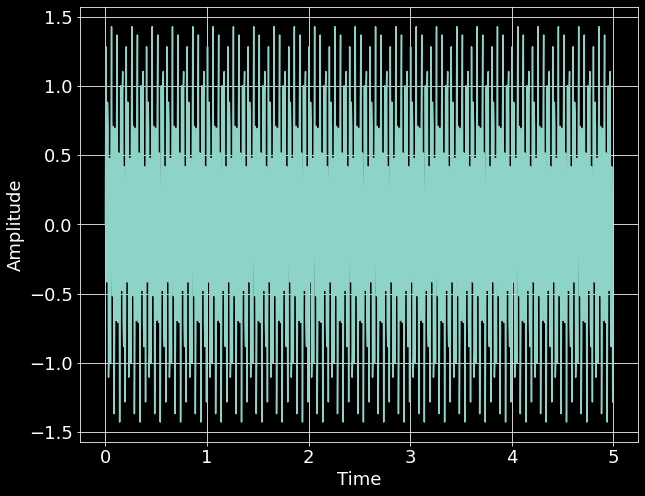

In [15]:
dt = 0.005
t = np.arange(0, 5, dt)
x = np.sin(2*np.pi*55*t) + 0.5*np.sin(2*np.pi*20*t)
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

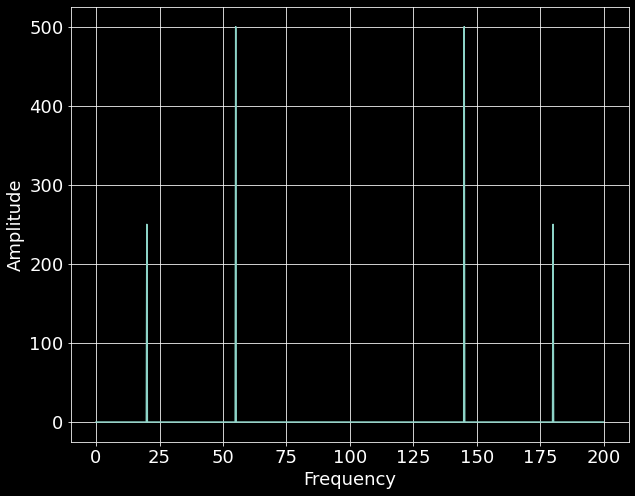

In [16]:
y = fft.fft(x)
f_max = 1/dt
df = f_max/len(x)
f = np.arange(0, f_max, df)
plt.plot(f, np.abs(y))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

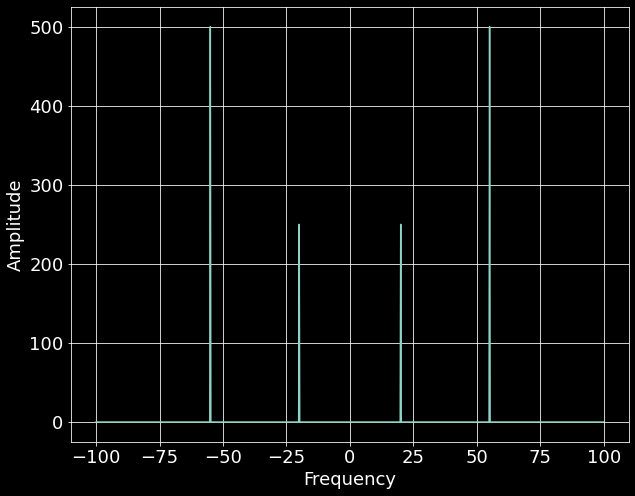

In [17]:
yshift = fft.fftshift(y)
fshift = np.arange(-f_max/2, f_max/2, df)
plt.plot(fshift, np.abs(yshift))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
# plt.xlim(0,30)
plt.show()

## Getting Phase

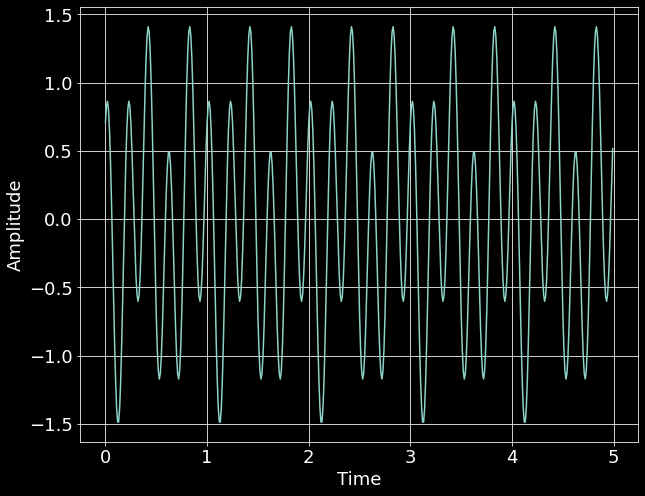

In [22]:
dt = 0.01
t = np.arange(0, 5, dt)
x = np.cos(2*np.pi*5*t-np.pi/4) - 0.5*np.sin(2*np.pi*2*t)
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [23]:
f_max = 1/dt
df = f_max/len(x)
y = fft.fft(x)
yshift = fft.fftshift(y)
fshift = np.arange(-f_max/2, f_max/2, df)

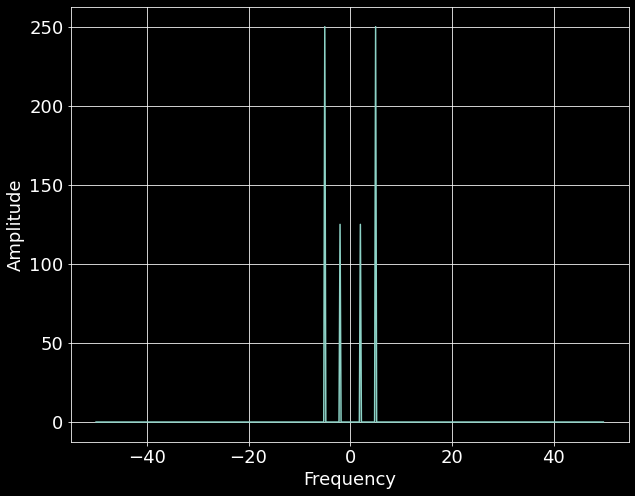

In [24]:
plt.plot(fshift, np.abs(yshift))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
# plt.xlim(0,30)
plt.show()

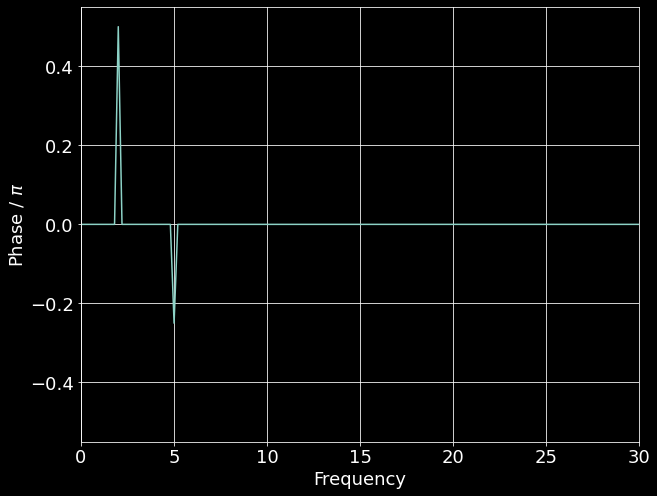

In [25]:
tol = 1e-6
yshift[np.abs(yshift) < tol] = 0
angle = np.angle(yshift)
plt.plot(fshift, angle/np.pi)
plt.xlabel('Frequency')
plt.ylabel("Phase / $\pi$")
plt.xlim(0,30)
plt.show()